<a href="https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plotting with `matplotlib`

In [ ]:
# Start with some simple numpy arrays. These are ordered pairs: x, y:
# 8, 5
# 13, 4
# 14, 18
# . . .

import numpy as np

x = np.array([8, 13, 14, 16, 16, 20, 25, 30, 38, 40])
y = np.array([5, 4, 18, 14, 20, 24, 28, 33, 30, 37])

In [ ]:
# Next import matplotlib.pyplot
import matplotlib.pyplot as plt

In [ ]:
# Create a simple plot of the values
plt.scatter(x, y)

In [ ]:
# Let z be a new calculation of a quadratic trendline for our data
z = np.polyfit(x, y, 2)

# Then p will be a plot of that line
p = np.poly1d(z)

In [ ]:
# Combine the two!

plt.plot(x, p(x))
plt.scatter(x,y)

In [ ]:
# As you want other types of plots, they are each separate methods to call
# from within pyplot:
plt.bar(x,y)

## Pie Chart

In [ ]:
# A pie chart is fairly simple in matplotlib

# Here are our data - a simple array of values. Together (added)
# they will make up the "whole" of the pie. Each value/whole will
# then represent a slice.
data = [44, 64, 98, 14]

# The plot itself uses the data object along with labels.
plt.pie(data, labels=['Albany','Birmingham','Cleveland','Denver'])

# Then show the plot
plt.show()

# Plotting with Seaborn

In [9]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# filter the df to get specific value ranges
filtered_df = df.loc[df['Age'] < 10]

# Select specific columns
selected_columns = filtered_df[['Age', 'Fare']]

print(selected_columns.head())

    Age     Fare
7   2.0  21.0750
10  4.0  16.7000
16  2.0  29.1250
24  8.0  21.0750
43  3.0  41.5792


[Text(0.5, 1.0, 'Fares for Children of the Titanic')]

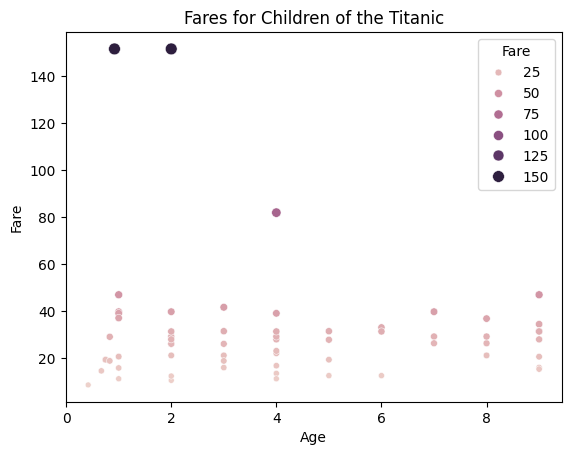

In [15]:
sns.scatterplot(x='Age', y='Fare', data=filtered_df, hue='Fare', size='Fare').set(title='Fares for Children of the Titanic')

# Exporting Output

Sometimes the output of a notebook needs to be saved outside of the notebook. This might involve an external database, file storage, or publishing to an API.

In [ ]:
%pip install boto3

In [ ]:
# setup boto3 / client
import boto3
from botocore.exceptions import ClientError
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for better visualization
sns.set_theme(style="whitegrid")

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Remove rows with missing age values
df = df.dropna(subset=['Age'])

# Convert ages to whole numbers
df['Age'] = df['Age'].astype(int)

# Calculate survival and death counts by age
survival_by_age = df.groupby('Age')['Survived'].agg(['count', 'sum']).reset_index()
survival_by_age['Died'] = survival_by_age['count'] - survival_by_age['sum']

# Normalize the counts to get widths between 0.2 and 1.0
min_width = 0.2
max_width = 1.0
survival_by_age['width'] = min_width + (survival_by_age['count'] - survival_by_age['count'].min()) / (survival_by_age['count'].max() - survival_by_age['count'].min()) * (max_width - min_width)

# Create the plot
plt.figure(figsize=(15, 6))
ax = plt.gca()

# Plot absolute numbers with variable widths
for i, row in survival_by_age.iterrows():
    ax.bar(row['Age'], row['sum'],
           width=row['width'],
           label='Survived' if i == 0 else '',
           color='green', alpha=0.7)
    ax.bar(row['Age'], row['Died'],
           width=row['width'],
           bottom=row['sum'],
           label='Died' if i == 0 else '',
           color='red', alpha=0.7)

# Customize the plot
plt.title('Survival and Death Counts by Age for All Titanic Passengers)')
plt.xlabel('Age')
plt.ylabel('No of Passengers')
plt.legend(loc='upper right')

# Set x-axis ticks to show only every 5th age
xticks = [age for age in survival_by_age['Age'] if age % 5 == 0]
plt.xticks(xticks, rotation=45)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('titanic_survival_plot.png', bbox_inches='tight', dpi=300)

# upload file to s3
s3 = boto3.client('s3')
bucket = "ds2002-jupyter"
file_name = "titanic_survival_plot.png"
try:
    response = s3.upload_file(file_name, bucket, file_name)
except ClientError as e:
    print("Error:", e)

Watch a version of this notebook:

https://www.youtube.com/watch?v=HZ2dO7ax4Bw
